# Project name : Red Wine Quality prediction
Dataset link: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
#Importing Necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Display all the columns of the dataframe
pd.set_option('display.max_column',None)
%matplotlib inline

In [2]:
#Reading data
dataset = pd.read_csv("winequality-red.csv")
df = dataset.copy()

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

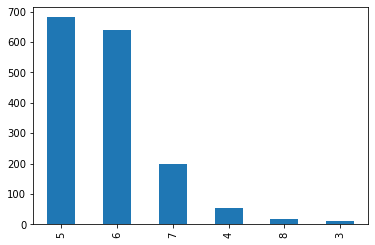

In [8]:
df['quality'].value_counts().plot.bar()

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Conclution
- There isn't any missing values
- There isn't any categorical feature 
- There are much more normal wines than excellent or poor ones.


# EDA on dataset

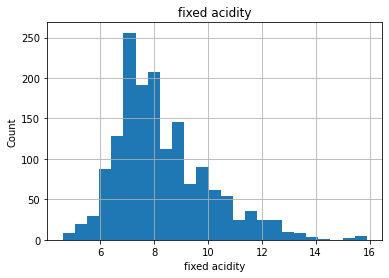

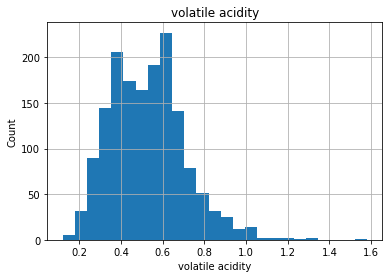

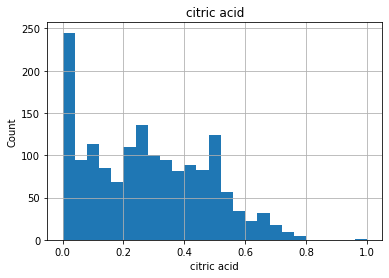

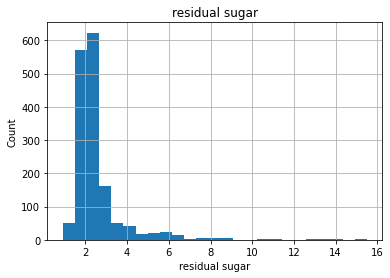

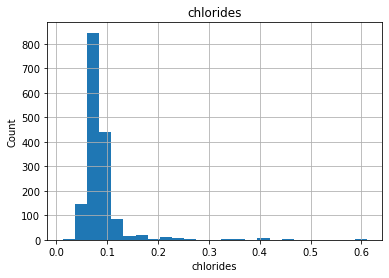

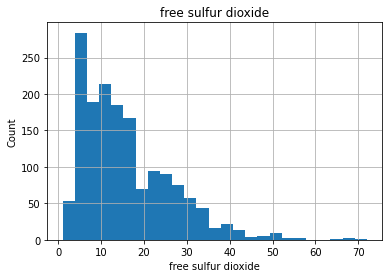

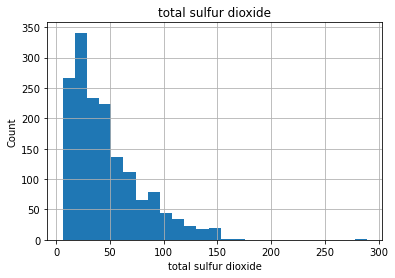

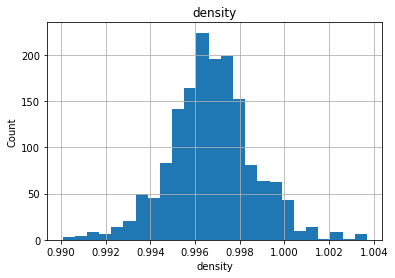

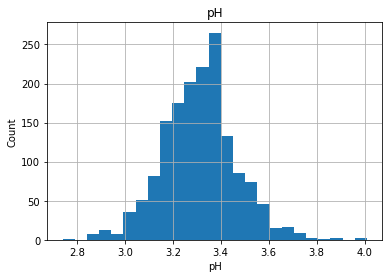

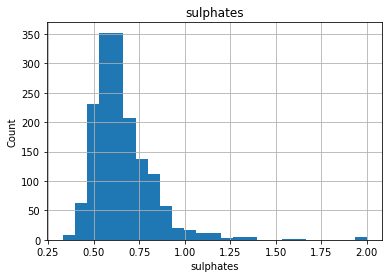

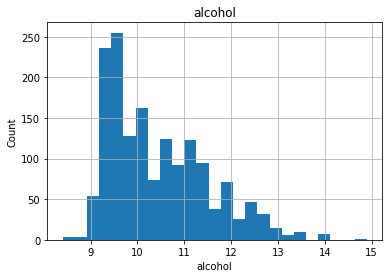

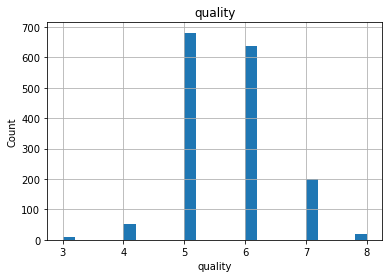

In [10]:
# Lets understand the distribution of all features
for feature in df.columns:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

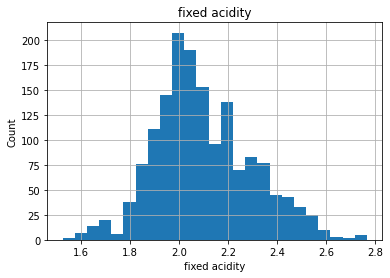

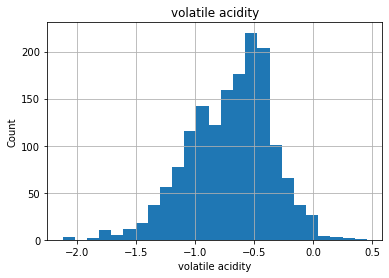

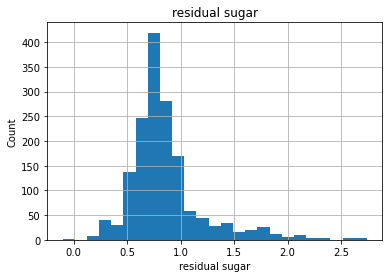

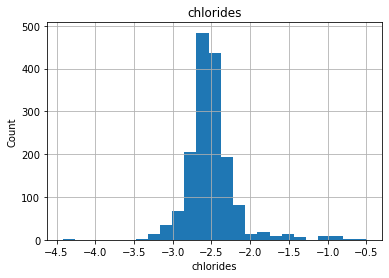

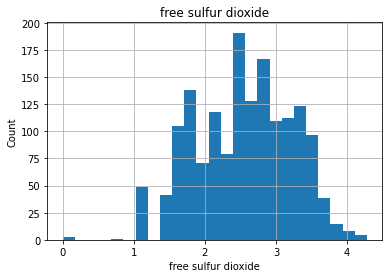

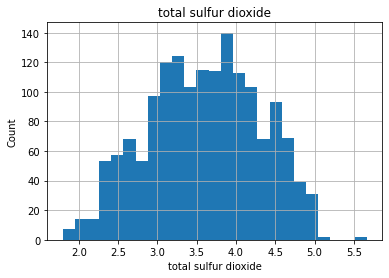

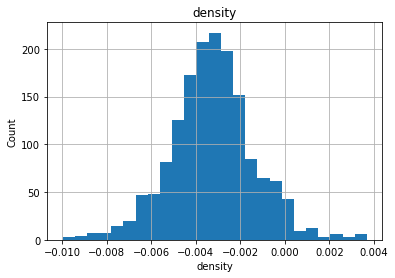

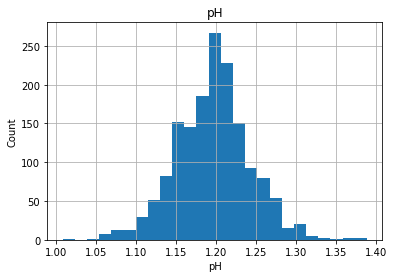

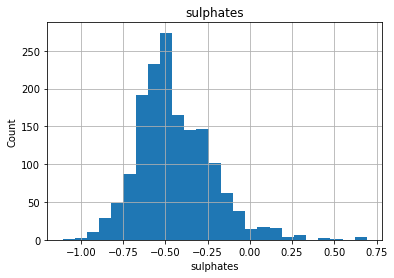

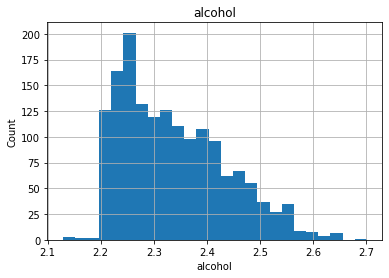

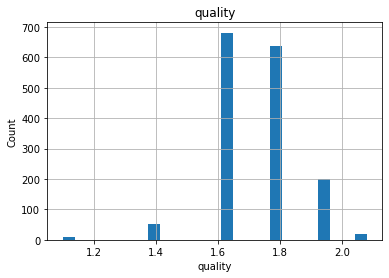

In [11]:
## We will be using logarithmic transformation
for feature in df.columns:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()
      

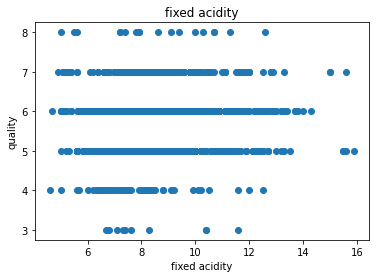

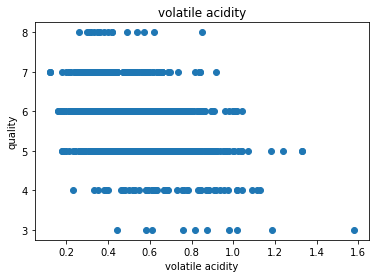

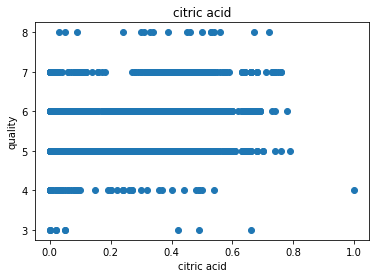

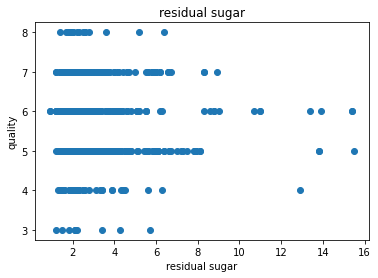

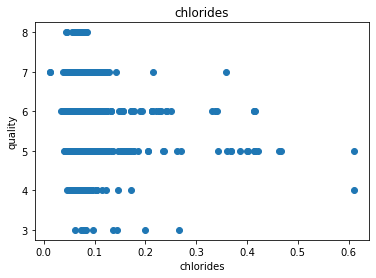

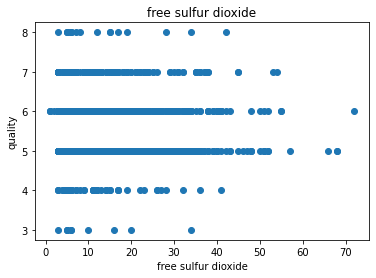

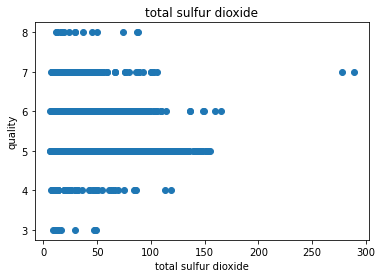

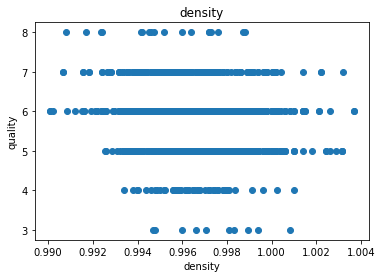

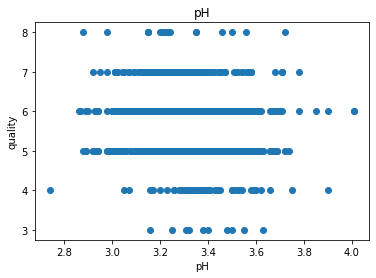

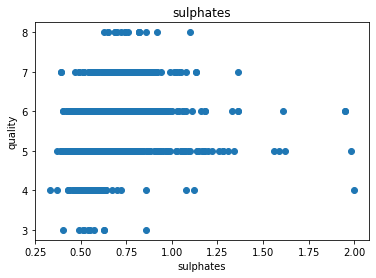

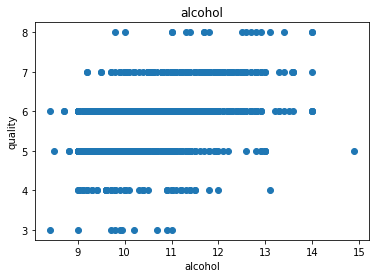

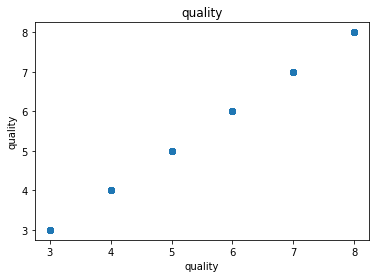

In [12]:
for feature in df.columns:
    plt.scatter(df[feature], df['quality'])
    plt.xlabel(feature)
    plt.ylabel('quality')
    plt.title(feature)
    plt.show()

# Outliers

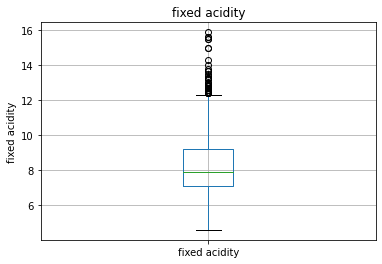

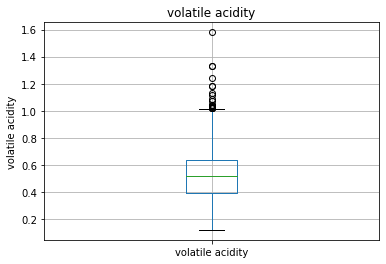

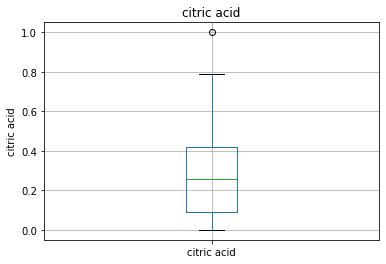

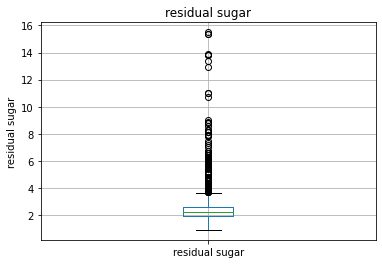

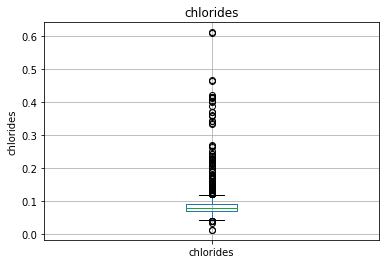

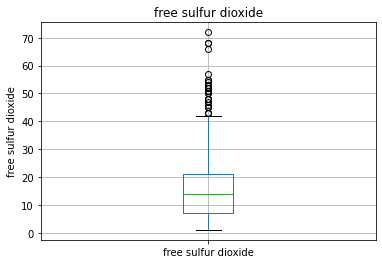

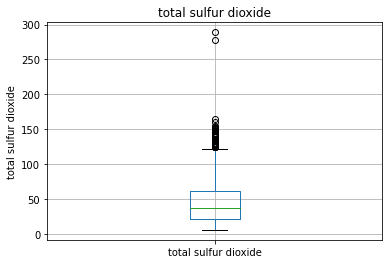

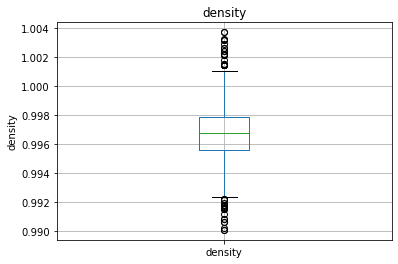

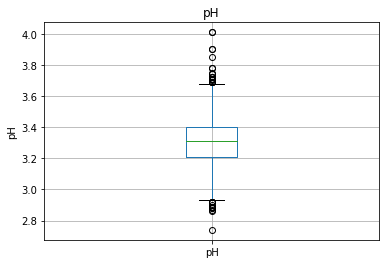

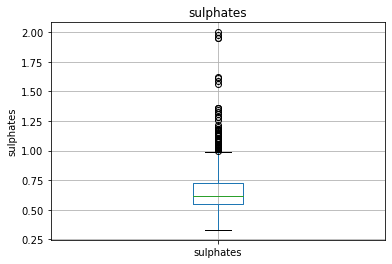

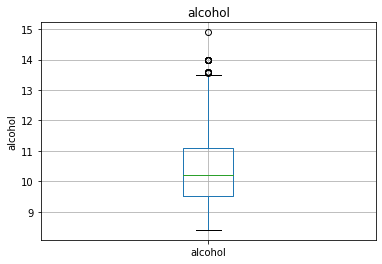

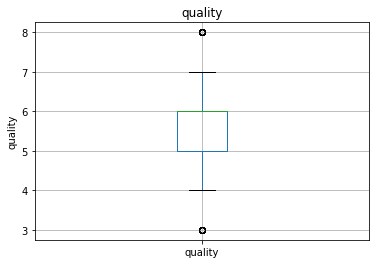

In [13]:
for feature in df.columns:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Conclution
- There are outliers
- Data aren't linearly correlated

# Feature Engineering

In [14]:
### Handling Outliers

In [15]:
name = "volatile acidity"
uppper_boundary=df[name].mean() + 3* df[name].std()
lower_boundary=df[name].mean() - 3* df[name].std()
print(lower_boundary), print(uppper_boundary),print(df[name].mean())

-0.009358599640093335
1.064999625281119
0.5278205128205128


(None, None, None)

In [16]:
remove_oulier = [feature for feature in df.columns if feature not in ['quality']]

In [17]:
len(remove_oulier)

11

In [18]:
for name in remove_oulier:
    IQR=df[name].quantile(0.75)-df[name].quantile(0.25)
    lower_bridge=df[name].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[name].quantile(0.75)+(IQR*1.5)
    df.loc[df[name]>=upper_bridge,name]=upper_bridge
    df.loc[df[name]<=lower_bridge,name]=lower_bridge
    print(f"{name}: upper={upper_bridge} and lower={lower_bridge}")

fixed acidity: upper=12.349999999999998 and lower=3.95
volatile acidity: upper=1.0150000000000001 and lower=0.015000000000000013
citric acid: upper=0.9149999999999999 and lower=-0.4049999999999999
residual sugar: upper=3.6500000000000004 and lower=0.8499999999999996
chlorides: upper=0.11999999999999998 and lower=0.04000000000000002
free sulfur dioxide: upper=42.0 and lower=-14.0
total sulfur dioxide: upper=122.0 and lower=-38.0
density: upper=1.0011875 and lower=0.9922475000000001
pH: upper=3.6849999999999996 and lower=2.925
sulphates: upper=0.9999999999999999 and lower=0.28000000000000014
alcohol: upper=13.5 and lower=7.1000000000000005


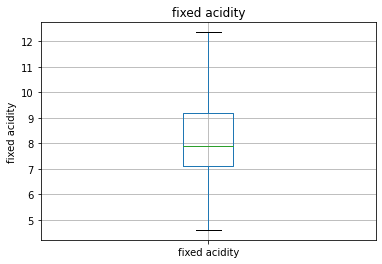

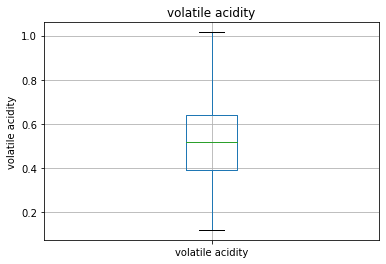

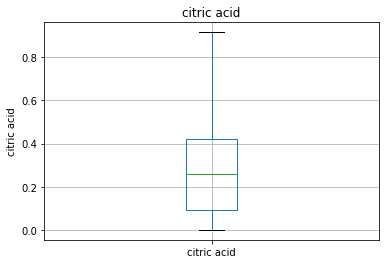

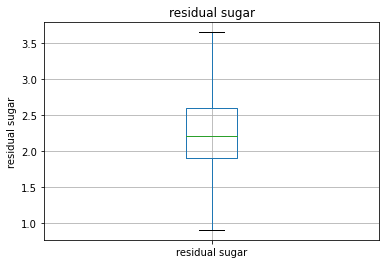

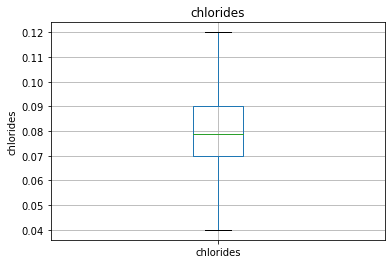

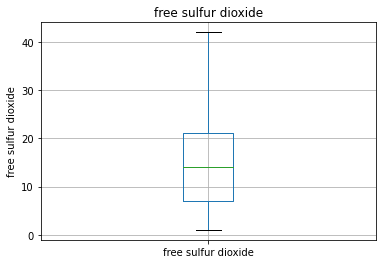

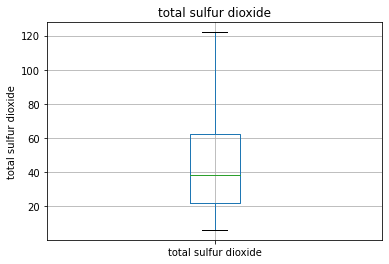

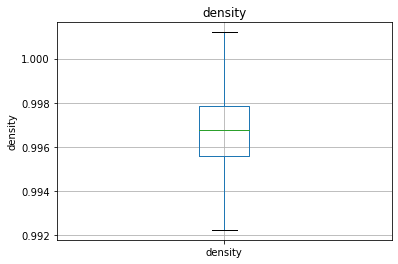

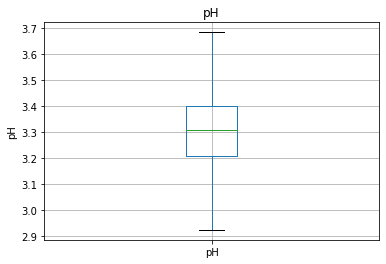

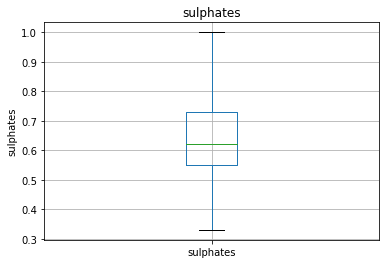

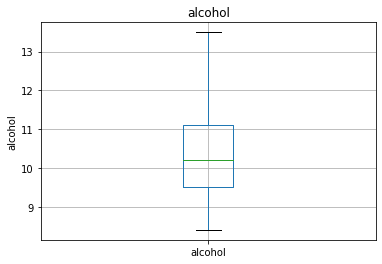

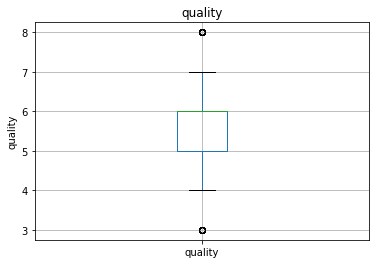

In [19]:
for feature in df.columns:
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

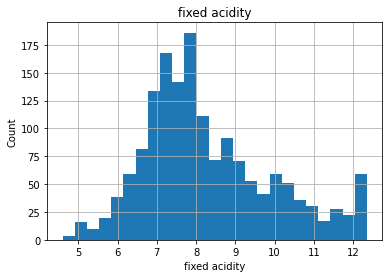

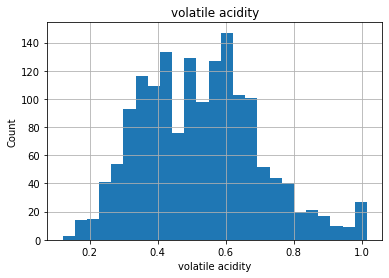

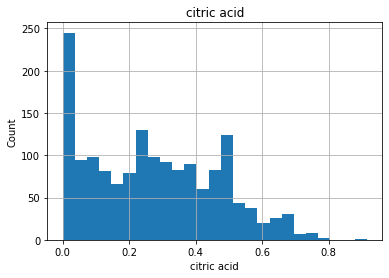

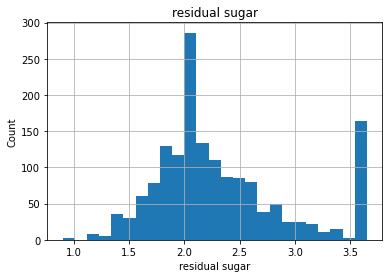

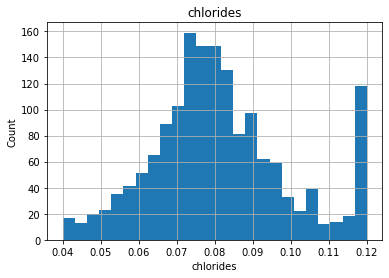

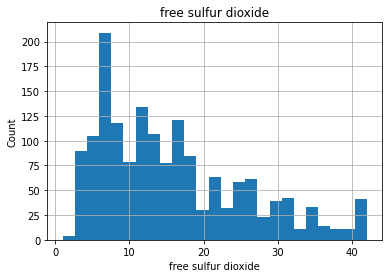

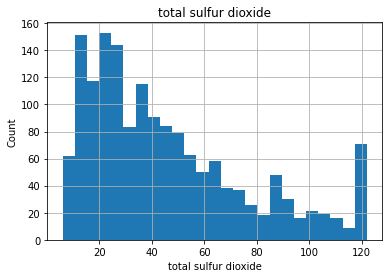

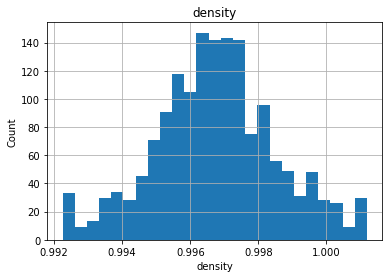

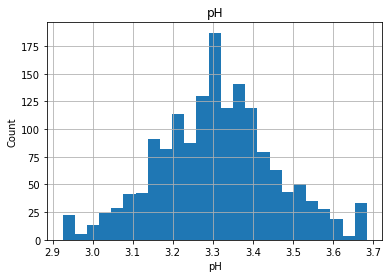

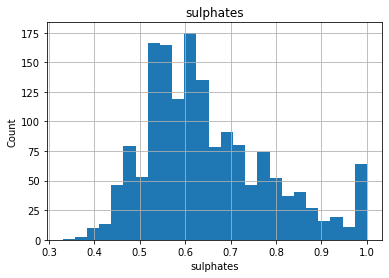

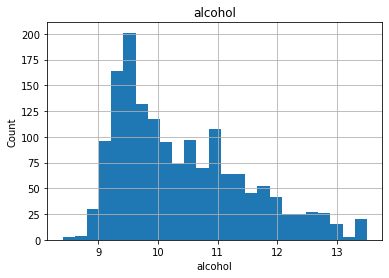

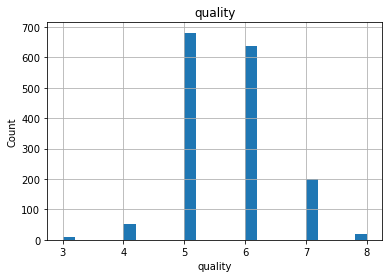

In [20]:
for feature in df.columns:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale  = pd.DataFrame(scaler.fit_transform(df[remove_oulier]),columns=remove_oulier)
df_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950
1,-0.296555,2.032132,-1.392540,0.455672,0.943237,0.946759,0.700988,0.031853,-0.736650,0.220142,-0.587615
2,-0.296555,1.342438,-1.186940,-0.036694,0.606477,-0.070078,0.272857,0.142624,-0.336128,0.001232,-0.587615
3,1.757401,-1.416339,1.485857,-0.693182,-0.347676,0.133289,0.470456,0.696475,-1.003665,-0.509557,-0.587615
4,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950


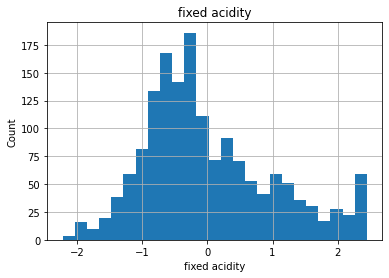

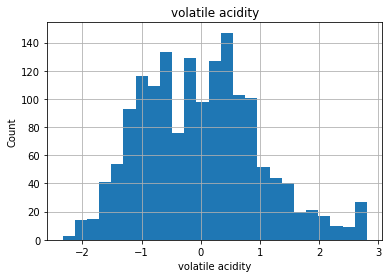

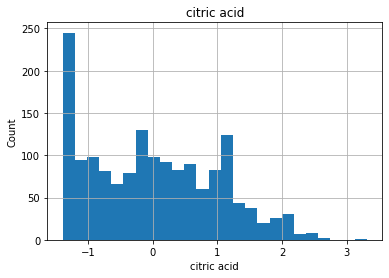

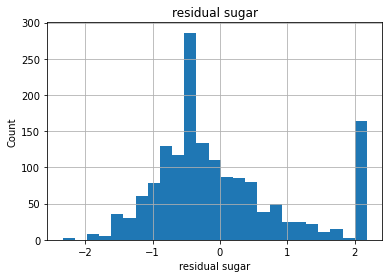

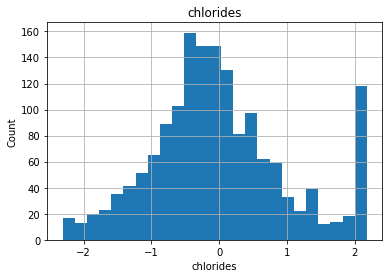

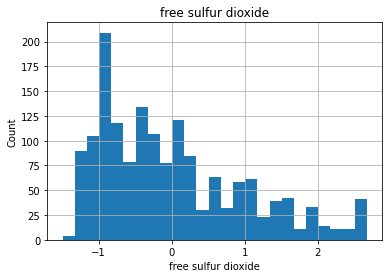

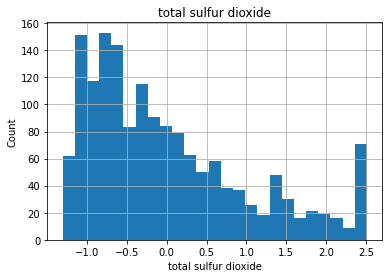

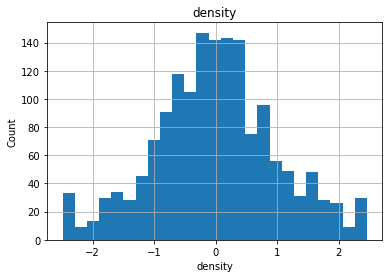

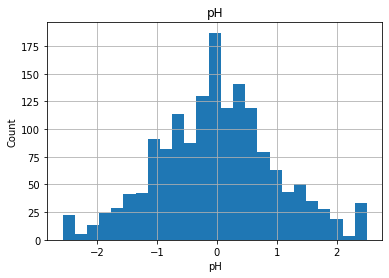

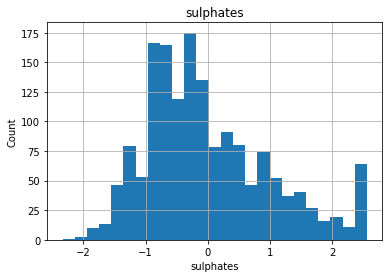

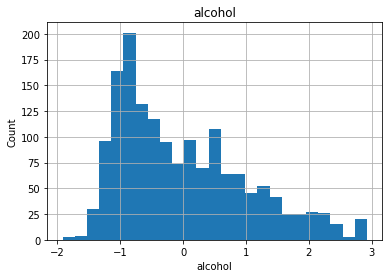

In [22]:
for feature in df_scale.columns:
    df_scale[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [23]:
data = pd.concat([df_scale,df['quality']],axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950,5
1,-0.296555,2.032132,-1.392540,0.455672,0.943237,0.946759,0.700988,0.031853,-0.736650,0.220142,-0.587615,5
2,-0.296555,1.342438,-1.186940,-0.036694,0.606477,-0.070078,0.272857,0.142624,-0.336128,0.001232,-0.587615,5
3,1.757401,-1.416339,1.485857,-0.693182,-0.347676,0.133289,0.470456,0.696475,-1.003665,-0.509557,-0.587615,6
4,-0.538197,0.997591,-1.392540,-0.693182,-0.291550,-0.476813,-0.385806,0.585705,1.332717,-0.655496,-0.966950,5


In [24]:
data.shape

(1599, 12)

# feature selection

In [25]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.268153,0.678704,0.215090,0.228484,-0.157083,-0.119486,0.668076,-0.689824,0.215195,-0.070242,0.125442
volatile acidity,-0.268153,1.000000,-0.560770,0.039427,0.133096,-0.005288,0.091583,0.017347,0.235347,-0.316181,-0.209385,-0.387608
citric acid,0.678704,-0.560770,1.000000,0.183553,0.147668,-0.060140,0.019277,0.369893,-0.546002,0.333402,0.111640,0.227144
residual sugar,0.215090,0.039427,0.183553,1.000000,0.208471,0.082933,0.157250,0.424354,-0.094584,0.034996,0.107114,0.023790
chlorides,0.228484,0.133096,0.147668,0.208471,1.000000,-0.012169,0.098054,0.407441,-0.259512,0.107645,-0.295608,-0.183037
free sulfur dioxide,-0.157083,-0.005288,-0.060140,0.082933,-0.012169,1.000000,0.687184,-0.034012,0.075415,0.049086,-0.068099,-0.050641
total sulfur dioxide,-0.119486,0.091583,0.019277,0.157250,0.098054,0.687184,1.000000,0.095871,-0.051863,-0.003229,-0.228860,-0.201542
density,0.668076,0.017347,0.369893,0.424354,0.407441,-0.034012,0.095871,1.000000,-0.336870,0.161310,-0.500237,-0.176330
pH,-0.689824,0.235347,-0.546002,-0.094584,-0.259512,0.075415,-0.051863,-0.336870,1.000000,-0.134702,0.195196,-0.061507
sulphates,0.215195,-0.316181,0.333402,0.034996,0.107645,0.049086,-0.003229,0.161310,-0.134702,1.000000,0.155310,0.328710


<AxesSubplot:>

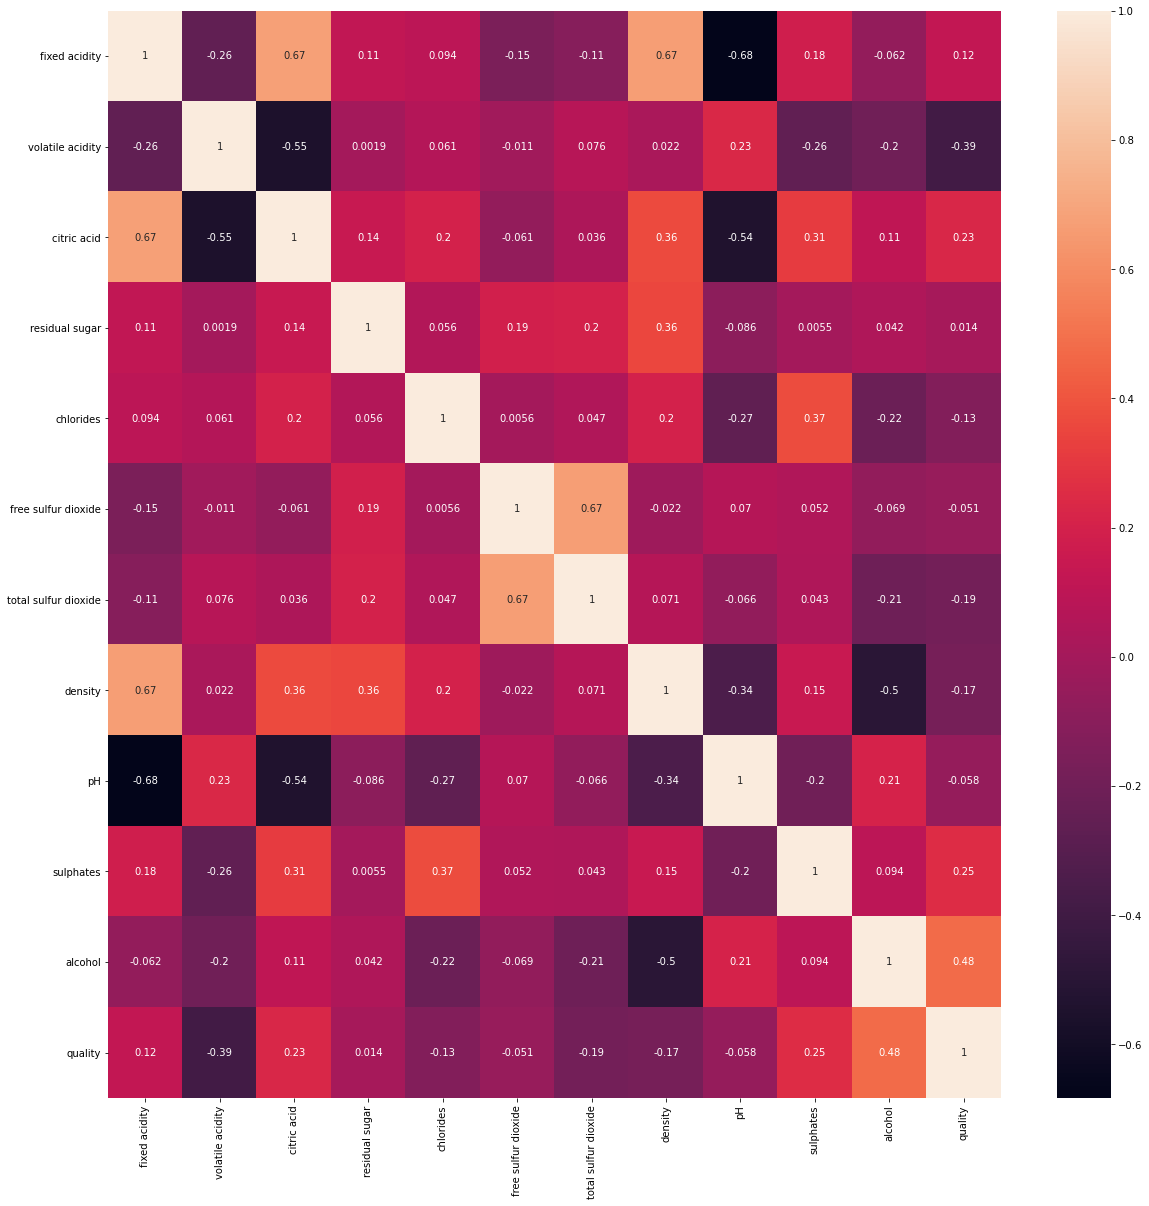

In [26]:
import seaborn as sns
corr=data.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(dataset[top_features].corr(),annot=True)

### Conclution
removing
- residual sugar
- free sulfur dioxide
- pH

In [27]:
drop_feature = ['residual sugar','free sulfur dioxide','pH']

In [28]:
data.drop(drop_feature,inplace=True,axis=1)

In [29]:
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.538197,0.997591,-1.392540,-0.291550,-0.385806,0.585705,-0.655496,-0.966950,5
1,-0.296555,2.032132,-1.392540,0.943237,0.700988,0.031853,0.220142,-0.587615,5
2,-0.296555,1.342438,-1.186940,0.606477,0.272857,0.142624,0.001232,-0.587615,5
3,1.757401,-1.416339,1.485857,-0.347676,0.470456,0.696475,-0.509557,-0.587615,6
4,-0.538197,0.997591,-1.392540,-0.291550,-0.385806,0.585705,-0.655496,-0.966950,5


In [30]:
data.shape

(1599, 9)

# Train- Test Split

In [31]:
y = data['quality']

In [32]:
data.drop("quality",inplace = True,axis=1)

In [33]:
x = data

In [34]:
x.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,-0.538197,0.997591,-1.392540,-0.291550,-0.385806,0.585705,-0.655496,-0.966950
1,-0.296555,2.032132,-1.392540,0.943237,0.700988,0.031853,0.220142,-0.587615
2,-0.296555,1.342438,-1.186940,0.606477,0.272857,0.142624,0.001232,-0.587615
3,1.757401,-1.416339,1.485857,-0.347676,0.470456,0.696475,-0.509557,-0.587615
4,-0.538197,0.997591,-1.392540,-0.291550,-0.385806,0.585705,-0.655496,-0.966950


In [35]:
x.shape

(1599, 8)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [37]:
X_train.shape

(1119, 8)

In [38]:
y_train.shape

(1119,)

In [39]:
X_test.shape

(480, 8)

In [40]:
y_test.shape

(480,)

# Selecting a good model

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("Accuracy Score: ",score)

Accuracy Score:  0.3252663442999225


# Cross validation

In [44]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(model, x, y, cv=10)
print(scr.mean())

0.26594750309521


# Error

In [45]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred,y_test)
print("MSE :", lin_mse)
rmse = np.sqrt(lin_mse)
print("RMSE: ",rmse)

MSE : 0.3980928568630457
RMSE:  0.6309460015429574


# Random forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("Accuracy Score: ",score)

Accuracy Score:  0.40138206214689254


# Cross validation

In [49]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(model, x, y, cv=10)
print(scr.mean())

0.2597563141579464


# Error

In [50]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred,y_test)
print("MSE :", lin_mse)
rmse = np.sqrt(lin_mse)
print("RMSE: ",rmse)

MSE : 0.35318458333333336
RMSE:  0.5942933478790868


# Decision Tree regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0,max_depth=24)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=24, random_state=0)

In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("Accuracy Score: ",score)

Accuracy Score:  -0.1723163841807911


# Cross validation

In [54]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(model, x, y, cv=10)
print(scr.mean())

-0.5780001921883228


# Error

In [55]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred,y_test)
print("MSE :", lin_mse)
rmse = np.sqrt(lin_mse)
print("RMSE: ",rmse)

MSE : 0.6916666666666667
RMSE:  0.83166499665831


# Impact Learning Regression

In [56]:
from ImpactLearning import Regressor

In [57]:
il = Regressor()
il.fit(X_train,y_train, loss_function="MSE", optimizer = "GD",)
il.train(epochs=2000, lr=0.5, progress_per=100)

Epoch: 100, loss: 0.422651 
Epoch: 200, loss: 0.422380 
Epoch: 300, loss: 0.422377 
Epoch: 400, loss: 0.422377 
Epoch: 500, loss: 0.422377 
Epoch: 600, loss: 0.422377 
Epoch: 700, loss: 0.422377 
Epoch: 800, loss: 0.422377 
Epoch: 900, loss: 0.422377 
Epoch: 1000, loss: 0.422377 
Epoch: 1100, loss: 0.422377 
Epoch: 1200, loss: 0.422377 
Epoch: 1300, loss: 0.422377 
Epoch: 1400, loss: 0.422377 
Epoch: 1500, loss: 0.422377 
Epoch: 1600, loss: 0.422377 
Epoch: 1700, loss: 0.422377 
Epoch: 1800, loss: 0.422377 
Epoch: 1900, loss: 0.422377 
Epoch: 2000, loss: 0.422377 
Training Completed


In [58]:
il.get_scores()

Loss: 0.422377


In [59]:
pred = il.predict(X_test)

In [60]:
from sklearn.metrics import r2_score
score = r2_score(y_test,pred)
print("Accuracy Score: ",score)

Accuracy Score:  0.3252663489281885


# Model output and Error


1. Linear Regression:
   - Accurecy score : 0.3252663442999225
   - Cross val score : 0.26594750309521
   - MSE : 0.3980928568630457
   - RMSE:  0.6309460015429574
2. Random Forest Regressor
   - Accurecy score : 0.40138206214689254
   - Cross val score : 0.2597563141579464
   - MSE : 0.35318458333333336
   - RMSE:  0.5942933478790868
3. Decision Tree Regressor
   - Accurecy score : -0.1723163841807911
   - Cross val score : -0.5780001921883228
   - MSE : 0.6916666666666667
   - RMSE:  0.83166499665831
4. Impact Learning
   - Accurecy score : 0.3252663489281885
   - MSE : 0.422377